# The elements of a plot

We start by importing the various packages that we will need.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

Recall the first plot we made:

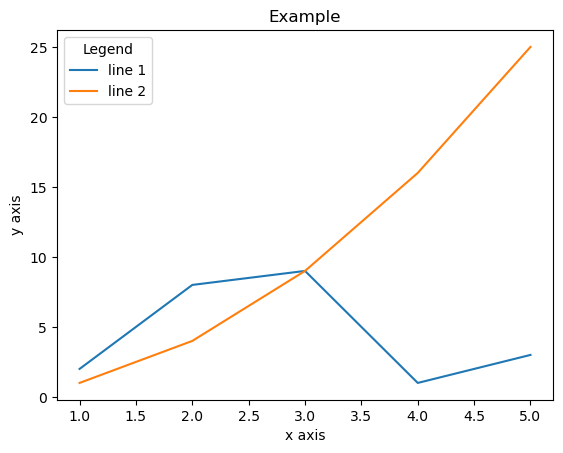

In [2]:
fig, ax = plt.subplots()

ax.plot([1,2,3,4,5], [2,8,9,1,3], label='line 1')
ax.plot([1,2,3,4,5], [1,4,9,16,25], label='line 2')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_title("Example")

ax.legend(title='Legend')

## Legend
The legend displays a label for different elements in the plot.
The labels should be set when the relevant data is plotted, and are added with the Axes method `legend()`, as in the plot above.
Provide a title for your legend with the optional `title` argument.
There are various parameters to control the appearance and location of the legend. As with the other plotting functions, the matplotlib documentation contains details about the parameters for each method.

## Axis Labels and plot title
The Axes methods `set_xlabel()`, `set_ylabel()`, `set_title()` are fairly self-explanatory and can be seen in the example above.

Optional parameters allow some control over the appearance of these titles, the following example shows some of the ways that text can be modified: the size, colour, transparency, weight, style, and locations can all be altered, as shown.
The example also shows how LaTeX can be used where text requires mathematical symbols.

The full list of formatting possibilities is available in the <a target="_blank" href="https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text">documentation</a>.

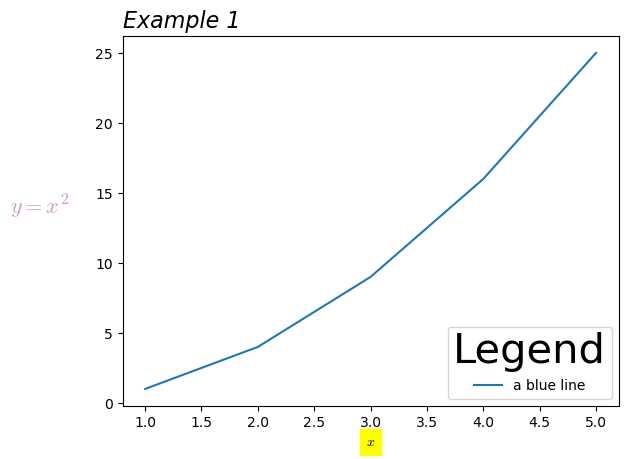

In [8]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5], [1,4,9,16,25], label="a blue line")

ax.set_title("Example 1", fontstyle='italic', fontsize=16,  loc='left')
ax.set_xlabel('$x$', backgroundcolor='yellow', fontweight='bold')
ax.set_ylabel('$y = x^2$', color='purple', alpha=0.4, fontsize=16,rotation=0,labelpad=40)
ax.legend(title='Legend', fontsize=10, title_fontsize=30, loc='lower right');

Note that matplotlib has correctly interpretted the LaTex command and used a superscript in $x^2$. However, it has still used a sans-serif font, which isn't how latex would format an equation by default. We can render the equation using Tex by setting the following parameter parameter:

In [4]:
plt.rcParams['text.usetex'] = True

In [7]:
# If you don't have Latex downloaded
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'

Using this option may mean that the figure could take longer to be created by Python, but the equations will be formatted in Tex. Re-run the last plot cell - you should see that the axes labels now use a serif font, as is common when writing mathematics. This difference may seem small, but it's something that mathematicians tend to notice, so formating with Tex can add a little mathematical polish to your plots. However, this may not always be the best choice, as serif fonts can be difficult for some people to read.

## Axis ticks and grid-lines
The ticks on an axis are the small lines which indicate the values along the axis.
The actual numbers are the tick labels.
The ticks are automatically added and values are chosen according to the data you're plotting.
Often the default behaviour is fine, but if you need to change the range of values along an axis or the interval between ticks there are methods to allow you to do so.
In between the ticks we can also display minor ticks to show smaller increments.
Minor ticks are not labelled.

The Axes method ``grid()`` modifies the grid-lines.
By default, grid-lines are not displayed.
Calling `grid()` without arguments toggles whether the grid-lines are displayed or not.
The method accepts a large number of optional arguments to specify the exact style of grid-lines, a selection of these are demonstrated in the following example.


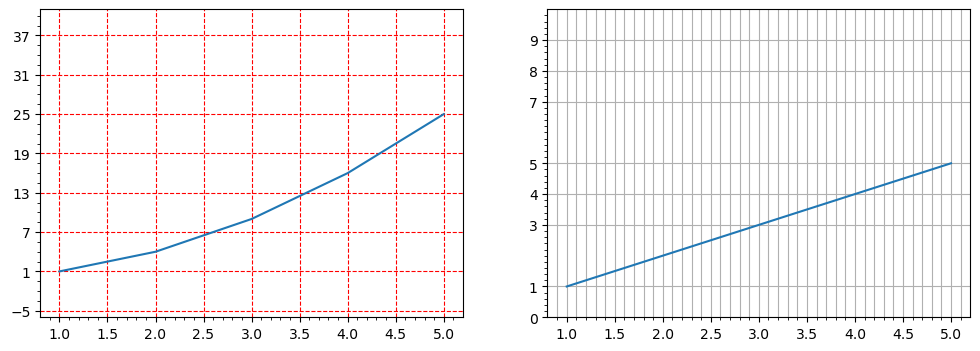

In [9]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

axs[0].plot([1,2,3,4,5], [1,4,9,16,25])
axs[0].set_ylim(-6, 41) # the y axis now ranges from -6 to 41
axs[0].set_yticks(range(-5, 41, 6)) # tick marks start at -5, end by 41, with 6 between adjacent ticks
axs[0].minorticks_on()
axs[0].grid(axis='both', linestyle='--', color='red') # dashed red grid lines for major ticks

axs[1].plot([1,2,3,4,5], [1,2,3,4,5])
axs[1].set_ylim(0,10)
axs[1].set_yticks([0,1,3,4,5,7,8,9]) # irregularly spaced ticks
axs[1].minorticks_on()
axs[1].grid(axis='y') # grid lines for major ticks on y axis
axs[1].grid(axis='x', which='both') # grid lines for minor ticks as well as major on x axis

The diagram below highlights several different objects within a plot and is based on one in the matplotlib documentation. It may be a useful reference to help you become familiar with the various names used within matplotlib.

![A plot graph showing the different objects within a plot. There objects shown are major tick, minor tick, major and minor tick labels, y and x axis labels, figure, axes, spines, line (line plot), markers (scatter plot), title, legend and grid.](./PFDS_matplotlib_anatomy.png)

The [code to produce this figure](https://matplotlib.org/stable/gallery/showcase/anatomy.html) is also included in the matplotlib documentation.

### Error bars
It is sometimes useful to add error bars onto the measurements.
This is done through the Axes method ``errorbars()``.
The first parameters of this method are the x and y values.
If adding error bars to an existing plot these will match the x and y values of the main plot.
The parameter ``yerr`` is given first the negative error for each bar and then the positive error for each bar.
If the negative and positive error are the same then just one list or array can be passed in, or if the error is the same for every bar then you can pass in just a single number.

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

# create a bar chart
axs[0].bar([1,2,3,4,5], [2,3,9,7,3])

# add error bars
axs[0].errorbar(
    [1,2,3,4,5],
    [2,3,9,7,3],
    yerr=[[0.5, 1, 0, 1, 2],[0.1, 0.1, 0.5, 3, 3]],
    linestyle='',
    color='black',
    capsize=5)

#create a scatter plot
axs[1].scatter(
    [1,2,3,4,5],
    [4,7,15,12,3]
)

# add error bars
axs[1].errorbar(
    [1,2,3,4,5],
    [4,7,15,12,3],
    yerr=[[0.5, 1, 0, 1, 2],[0.1, 0.1, 0.5, 3, 3]],
    linestyle='',
    color='grey',
    capsize=5)

## Scaling
Either axis can be rescaled using the Axes methods ``set_xscale()`` and ``set_yscale()``.
The default is for both x and y axis to use a linear scale.

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

x = np.linspace(0,9.9,100) # 100 evenly spaced numbers between 0 and 10
y = np.exp2(x) # calculate 2**i for each element of x

axs[0].plot(x, y)
axs[0].set_title('Linear scale')

axs[1].plot(x,y)
axs[1].set_yscale('log') # set the y axis to a log scale
axs[1].set_title('Log scale')

## Colours
We've already seen how to set the colour of many parts of a plot.
In addition, the background of the figure and each Axes can be coloured.

In general, where colours are used they can be specified with a name from the colour names listed in the <a target="_blank" href="https://matplotlib.org/stable/gallery/color/named_colors.html">documentation</a>.
This is how we have specified colours in the examples so far.
Alternatively, colours can be specified using a hex string or RBG tuple.
This gives access to a much wider variety of colours and is important if you're working on a project that requires you to use a particular colour scheme.


In [ ]:
fig, ax = plt.subplots(facecolor='lightblue') # named colour, set background of figure
ax.set_facecolor((0.56,0.93,0.56)) # rgb , set background color on Axes (green)
ax.set_xlabel('x axis label', color='#FF0000') # hex string (red)

Instead of specifying the colours for each element we can use a colormap.
A colour map is a sequence of colours.
Matplotlib provides several options for <a target="_blank" href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">choosing colour maps in Matplotlib</a>.
The following example shows how to use a colormap in a scatter plot.
Previously we passed a list of colour names to the parameter `c`, now we pass in a list of numbers and provide a colormap name.
The colours are selected from the colormap according to the provided numbers.

In [ ]:
fig, ax = plt.subplots()

scatter_plot = ax.scatter(
    [1,2,3,4,5],
    [1,4,8,2,7],
    c=[1,2,2,1,3],
    s=[100]*5,
    cmap='tab10'
)

## Creating a figure with multiple Axes
It's possible to create a figure without any Axes and add new Axes to an existing figure using the ``subplots()`` method on the figure object.
However, it is most common to create a figure and all the Axes within it at the same time - this is what every example so far in the lesson has done.

The pyplot function ``subplots()`` creates a figure and (one or several) Axes and returns references to all of these in a numpy array.
List indexing allows access to individual Axes.
If there are multiple Axes they are arranged in a grid pattern.

There are no required parameters for ``subplots()`` but lots of optional parameters which allow fine control.
Some of these optional parameters have been seen already in this lesson, the most important are described in the following table and demonstrated in the example that follows.

|parameter|value type|meaning|must be keyword|
|---|---|---|---|
|nrows|int|the number of rows of Axes|no|
|ncols|int|the number of columns of Axes|no|
|sharex|Bool|should Axes in the same column use the same x axis|no|
|sharey|Bool|should Axes in the same row use the same y axis|no|
|figsize|(int,int)|the (width, height) in inches of the figure|yes|


In [ ]:
# nrow=3 ncols=2 sharey=False (default)
fig, axs = plt.subplots(3 , 2, sharex=True, figsize=(10,6))

for i in range(3):
    for j in range(2):
        axs[i][j].set_title('Axes {row}, {col}'.format(row=i+1,col=j+1))

fig.tight_layout(h_pad=1, w_pad=2)

Sometimes the layout of the subplots is not perfect, with titles and Axes overlapping or axis labels falling outside of the figure area.
The figure method ``tight_layout()`` can help with the following parameters:

|parameter|value type|meaning|must be keyword|
|---|---|---|---|
|pad|float|the padding around the border of the figure|yes|
|h_pad|float|horizontal padding between subplots|yes|
|w_pad|float|width padding between subplots|yes|

Without any arguments, ``tight_layout()`` will attempt to automatically optimise the layout of the figure, and often this is sufficient to fix any problems.

The following example shows how multiple Axes can be added to a figure without using the grid pattern of ``subplots()``.
The method ``add_axes()`` on the figure object takes a list of floats as its first parameter, this specifies the position of the new Axes within the figure.
The values are a fraction of the total figure width or height and give, in order, the position of the left of the Axes, the bottom of the Axes, its width, and its height.
For example, \[0.5, 0.25, 0.3, 0.2\] indicates an Axes whose bottom, left corner is positioned half way along the width of the figure, a quarter of the way along the height of the figure.
The Axes width is 0.3 of the total width of the figure and its height it 0.2 of the total height of the figure.

Being able to specify the exact position that the Axes is placed within the figure gives a great deal of control.
Axes will overlap if necessary.

In [ ]:
fig = plt.figure()

ax1 = fig.add_axes([0, 0, 0.6, 0.5])
ax2 = fig.add_axes([0.4, 0.3, 0.3, 0.3])

xrange = [1,2,3,4,5,6,7]
values = [4,7,15,12,3,0,0]

ax1.bar(xrange, values)

ax2.plot(xrange[:-2], values[:-2])
ax2.scatter(xrange[:-2], values[:-2])

For a result which is somewhere between the strict grid layout of `subplots()` and the completely freeform layouts which are possible when directly adding Axes to a figure, we can use `gridspec`.
We again create a grid, but now it's possible to have an Axes which spans multiple spaces in the grid.

Having created a figure, create a `GridSpec` object for this figure by passing in the number of columns and rows in the grid.
Each Axes is added to the figure using the figure method `add_subplot()` with an argument specifying which of the cells of the grid this Axes should cover.
The syntax to identify the correct cells from the `GridSpec` object is similar to that for list slicing.
For example, `gs[2, 0:2]` selects the third row (2 specifies the third row because of zero indexing), and the first and second columns.
When passed to `add_subplot()` this will create an Axes which starts at the first cell of the third column and is two cells wide.

Study the following example to see how it works:


In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,4))

gs = GridSpec(3, 4, figure=fig)

# gs[0, :] - first (top) row, all columns
ax1 = fig.add_subplot(gs[0, :])
ax1.set_title('ax1')

# gs[1, :-1] - second (middle) row, from start until last-but-one column
ax2 = fig.add_subplot(gs[1, :-1])
ax2.set_title('ax2')

# gs[1:, -1] - from second until last row, last column
ax3 = fig.add_subplot(gs[1:, -1])
ax3.set_title('ax3')

# gs[2, 0:2] - third (bottom) row, from first until second column
ax4 = fig.add_subplot(gs[2, 0:2])
ax4.set_title('ax4')

# gs[-1, -2] - last (bottom) row, last-but-one column
ax5 = fig.add_subplot(gs[-1, -2])
ax5.set_title('ax5')

# allow enough space between each Axes to avoid overlap
fig.tight_layout()

## Drawing shapes

Matplotlib patches provide a simple way to add shapes to an Axes.
This might be used to highlight some part of a plot, for example.

For example,
- a `Circle()` is defined by the x and y coordinates of its centre, and a radius.
- a `Polygon()` is defined by the x and y coordinates of its vertices.

In [ ]:
import matplotlib.patches as patches

fig, ax = plt.subplots()

c = patches.Circle((0,0), radius=3, alpha=0.5)
ax.add_patch(c)

p = patches.Polygon(((1,1),(3,5),(7,2)), color='orange', alpha=0.5)
ax.add_patch(p)

ax.set_xlim(-5,10)
ax.set_ylim(-10,10)

## Object oriented style vs. state-based style

In every example in this lesson, we have begun by creating a figure and (a number of) Axes, then used Axes methods to add some kind of plot or otherwise make any changes.
Several of these methods are also available from pyplot directly.
Recall our very first example in this lesson, drawing a simple line plot.

In [ ]:
fig, ax = plt.subplots()

ax.plot([1,2,3,4,5], [2,8,9,1,3], label='line 1')
ax.plot([1,2,3,4,5], [1,4,9,16,25], label='line 2')
ax.legend(title='Legend')

Instead of explicitly creating the figure and Axes using `subplot()` and then using `ax.plot()`, we could simply call `plt.plot()` and pyplot would know that it needs to make a figure and Axes to put the line onto.

In [ ]:
plt.plot([1,2,3,4,5], [2,8,9,1,3], label='line 1')
plt.plot([1,2,3,4,5], [1,4,9,16,25], label='line 2')
plt.legend(title='Legend')

This is just an alternative way of plotting the same thing, both approaches are valid.
For simple tasks this saves a line or two of code.
`plt.plot()` adds the line to the _current_ Axes, in the _current_ figure.
The first line of code created a figure and Axes because none existed already, the second line added to that Axes.
There is a method in pyplot to get the current Axes, `gca()` (similarly `gcf()` gets the current figure).
When calling `plt.plot()` pyplot essentially uses `gca()` to get the current Axes and then calls the Axes method `plot()` on this.
The same pattern is used for many other Axes methods, all will affect the current Axes when called in this way.

Overall, the object oriented style used throughout this lesson gives clarity about which object is being modified by any line of code, and allows for an easier transition from very simple to more complicated plots.
The reason for mentioning the alternative style is that you may prefer it for simple tasks and many examples on the web use this style.
Working through examples from online resources is an excellent way to practise and develop what you've learned, being aware of these two different ways of using matplotlib will hopefully mean you're not confused if an example uses the other approach.

There is one other way of using matplotlib, which is to import pylab.
Pylab is a module that includes matplotlib.pyplot, numpy, and other useful functions, all within a single namespace.
Its purpose was to allow easy access to a variety of functionality in a single place but using pylab is now generally discouraged because importing so much functionality into the global namespace can result in unexpected behaviour.

As well as a current figure there may be other figures in memory.
At the start of the lesson we said that `plt.show()` displays all open figures.
To see which figures are open use the pyplot function `get_fignums()`.
The function `close()` will close the current figure if called without arguments, or you can pass in a figure number, or 'all' to close all the open figures.
This can be useful for managing memory.
